<a href="https://colab.research.google.com/github/rht6226/DL/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition using Convolutional Neural Network

Here we will be building a Convolutional Neural Network using keras and then we will use this network to predict handwritten digits form (0 - 9).

## Dataset

We will use the popular mnist dataset. This dataset consists of 70,000 images of handwritten digits from 0–9. We will attempt to identify them using a CNN.

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset.

In [35]:
from keras.datasets import mnist

# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train, X_test = X_train / 255.0, X_test/255.0

print("Number of images in training set : {}".format(X_train.shape[0]))
print("Number of images in test set : {}".format(X_test.shape[0]))
print("Size of each image : {}".format(X_train[0].shape))

Number of images in training set : 60000
Number of images in test set : 10000
Size of each image : (28, 28)


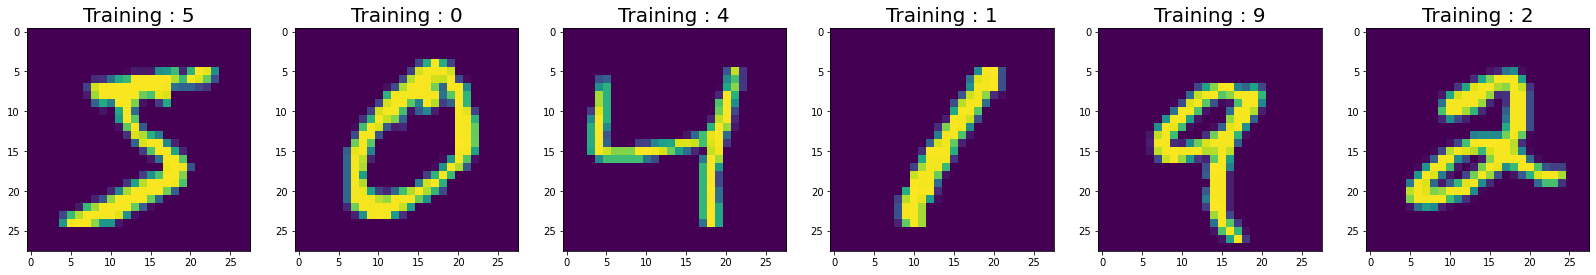

In [36]:
import matplotlib.pyplot as plt

# Visualise the dataset
plt.figure(figsize=(28,28))

for index, (image, label) in enumerate(zip(X_train[0:6], y_train[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image)
    plt.title('Training : {}'.format(label), fontsize=20)


In [37]:
# Reshape the data in X_train and X_test to fit the model

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One hot encode the data in y_train and y_test
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Modified shape of X_train = {} \nModified shape of X_test = {}".format(X_train.shape, X_test.shape))
print("One Hote Encoded sample : {}".format(y_train[0]))

Modified shape of X_train = (60000, 28, 28, 1) 
Modified shape of X_test = (10000, 28, 28, 1)
One Hote Encoded sample : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Building and training model - 1

Now we will build a convolutional model using a Sequential model in Keras.
It will allow us to build the model layer by layer.

Layer 1 : Conv Layer

*   Kernel Size - (3, 3)      	
* Number of Kernels 	- 64
* Activation -	 ReLu        
* Input Size   	- (28, 28, 1)

Layer 2: Conv Layer
*   Kernel Size - (3, 3)      	
* Number of Kernels 	- 32
* Activation -	 ReLu        

Layer 3: Flatten

Layer 4: Softmax with 10 outputs




In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Creating Model
model1 = Sequential()

# Adding Layers
model1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model1.add(Conv2D(32, kernel_size=3, activation='relu'))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

# Compiling the Sequential Model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
 665/1875 [=========>....................] - ETA: 1:41 - loss: 0.2214 - accuracy: 0.9338

In [ ]:
from keras.utils.vis_utils import plot_model
# Model Visualisation


print('\nSummary of Model 1 :\n')
print(model1.summary())

print('\nVisualisation of Model 1 :\n')
plot_model(model1, show_shapes=True, show_layer_names=True)

## Building and training model - 2

Now we will build another convolutional model using Sequential model in Keras.
Here we will use 5 x 5 convolutions

Layer 1 : Conv Layer

*   Kernel Size - (5, 5)      	
* Number of Kernels 	- 32
* Activation -	 ReLu        
* Input Size   	- (28, 28, 1)

Layer 2: Conv Layer
*   Kernel Size - (5, 5)      	
* Number of Kernels 	- 16
* Activation -	 ReLu        

Layer 3: Flatten

Layer 4: Softmax with 10 outputs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Creating Model
model2 = Sequential()

# Adding Layers
model2.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(16, kernel_size=5, activation='relu'))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

# Compiling the Sequential Model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [ ]:
# Model Visualisation


print('\nSummary of Model 2 :\n')
print(model2.summary())

print('\nVisualisation of Model 1 :\n')
plot_model(model2, show_shapes=True, show_layer_names=True)

## Building and training the model - 3

Now we will build another convolutional model using Sequential model in Keras.
Here we will use 3 x 3 as well as 5 x 5 convolutions

Layer 1 : Conv Layer

*   Kernel Size - (3, 3)      	
* Number of Kernels 	- 64
* Activation -	 ReLu        
* Input Size   	- (28, 28, 1)

Layer 2: Conv Layer
*   Kernel Size - (5, 5)      	
* Number of Kernels 	- 32
* Activation -	 ReLu        

Layer 3: Flatten

Layer 4: Softmax with 10 outputs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Creating Model
model3 = Sequential()

# Adding Layers
model3.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model3.add(Conv2D(32, kernel_size=5, activation='relu'))
model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))

# Compiling the Sequential Model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [ ]:
from keras.utils.vis_utils import plot_model
# Model Visualisation


print('\nSummary of Model 1 :\n')
print(model3.summary())

print('\nVisualisation of Model 1 :\n')
plot_model(model3, show_shapes=True, show_layer_names=True)